In [8]:
#importamos las librerias necesarias para trabajar en el primer TP

import xgboost as xgb  #Libreria de algoriitmo de boosting, sive para hacer la prediccion
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones
from sklearn.model_selection import train_test_split 

In [9]:
data = pd.read_csv("D:\Usuario\Downloads\udemy_courses.csv")

In [10]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [11]:
[columna for columna in data.columns if data[columna].nunique() == 1] #Usamos el ciclo for para encontrar valores unicos

[]

In [12]:
columnsToDelete=["url","course_title","course_id",
"published_timestamp"]
data.drop(columns = columnsToDelete, inplace=True) 

In [13]:
data[column].isnull().sum()

NameError: name 'column' is not defined

In [14]:
data.isnull().sum().any() 

False

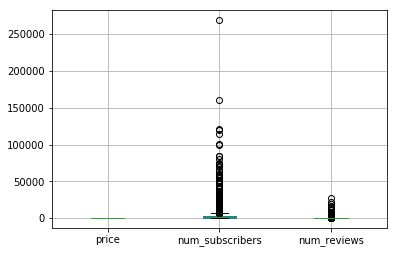

In [15]:
data.boxplot(['price','num_subscribers','num_reviews'])

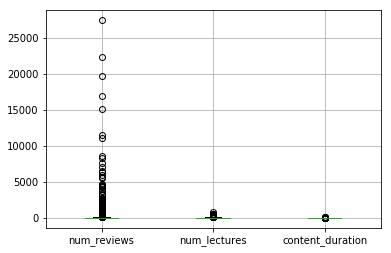

In [16]:
data.boxplot([ 'num_reviews','num_lectures','content_duration'])

In [17]:
data.loc[data['num_reviews']>data['num_reviews'].quantile(0.95),'num_reviews'] = data['num_reviews'].quantile(0.95)

In [18]:
data.loc[data['num_subscribers']>data['num_subscribers'].quantile(0.95),'num_subscribers'] = data['num_subscribers'].quantile(0.95)

In [19]:
data.loc[data['num_subscribers'] >= 15000]

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject


In [20]:
data.loc[(data['num_reviews'] >= 600) & (data['content_duration'] <= 3.000000)].drop_duplicates()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject


In [21]:
data1 = pd.get_dummies(data['is_paid'], prefix='pay') 
data = pd.concat([data, data1], axis=1)  

In [22]:
data1 = pd.get_dummies(data['subject'], prefix='subj') 
data = pd.concat([data, data1], axis=1)  

In [23]:
data1 = pd.get_dummies(data['level'], prefix='nivel') 
data = pd.concat([data, data1], axis=1)  

In [24]:
columnsToDelete=["level","subject","is_paid"]
data.drop(columns = columnsToDelete, inplace=True) 

In [25]:
data.columns

Index([u'price', u'num_subscribers', u'num_reviews', u'num_lectures',
       u'content_duration', u'pay_False', u'pay_True',
       u'subj_Business Finance', u'subj_Graphic Design',
       u'subj_Musical Instruments', u'subj_Web Development',
       u'nivel_All Levels', u'nivel_Beginner Level', u'nivel_Expert Level',
       u'nivel_Intermediate Level'],
      dtype='object')

In [26]:
analisis2 = data[[u'price', u'num_subscribers', u'num_reviews', u'num_lectures',
       u'content_duration', u'pay_False', u'pay_True',
       u'subj_Business Finance', u'subj_Graphic Design',
       u'subj_Musical Instruments', u'subj_Web Development',
       u'nivel_All Levels', u'nivel_Beginner Level', u'nivel_Expert Level',
       u'nivel_Intermediate Level']].corr()

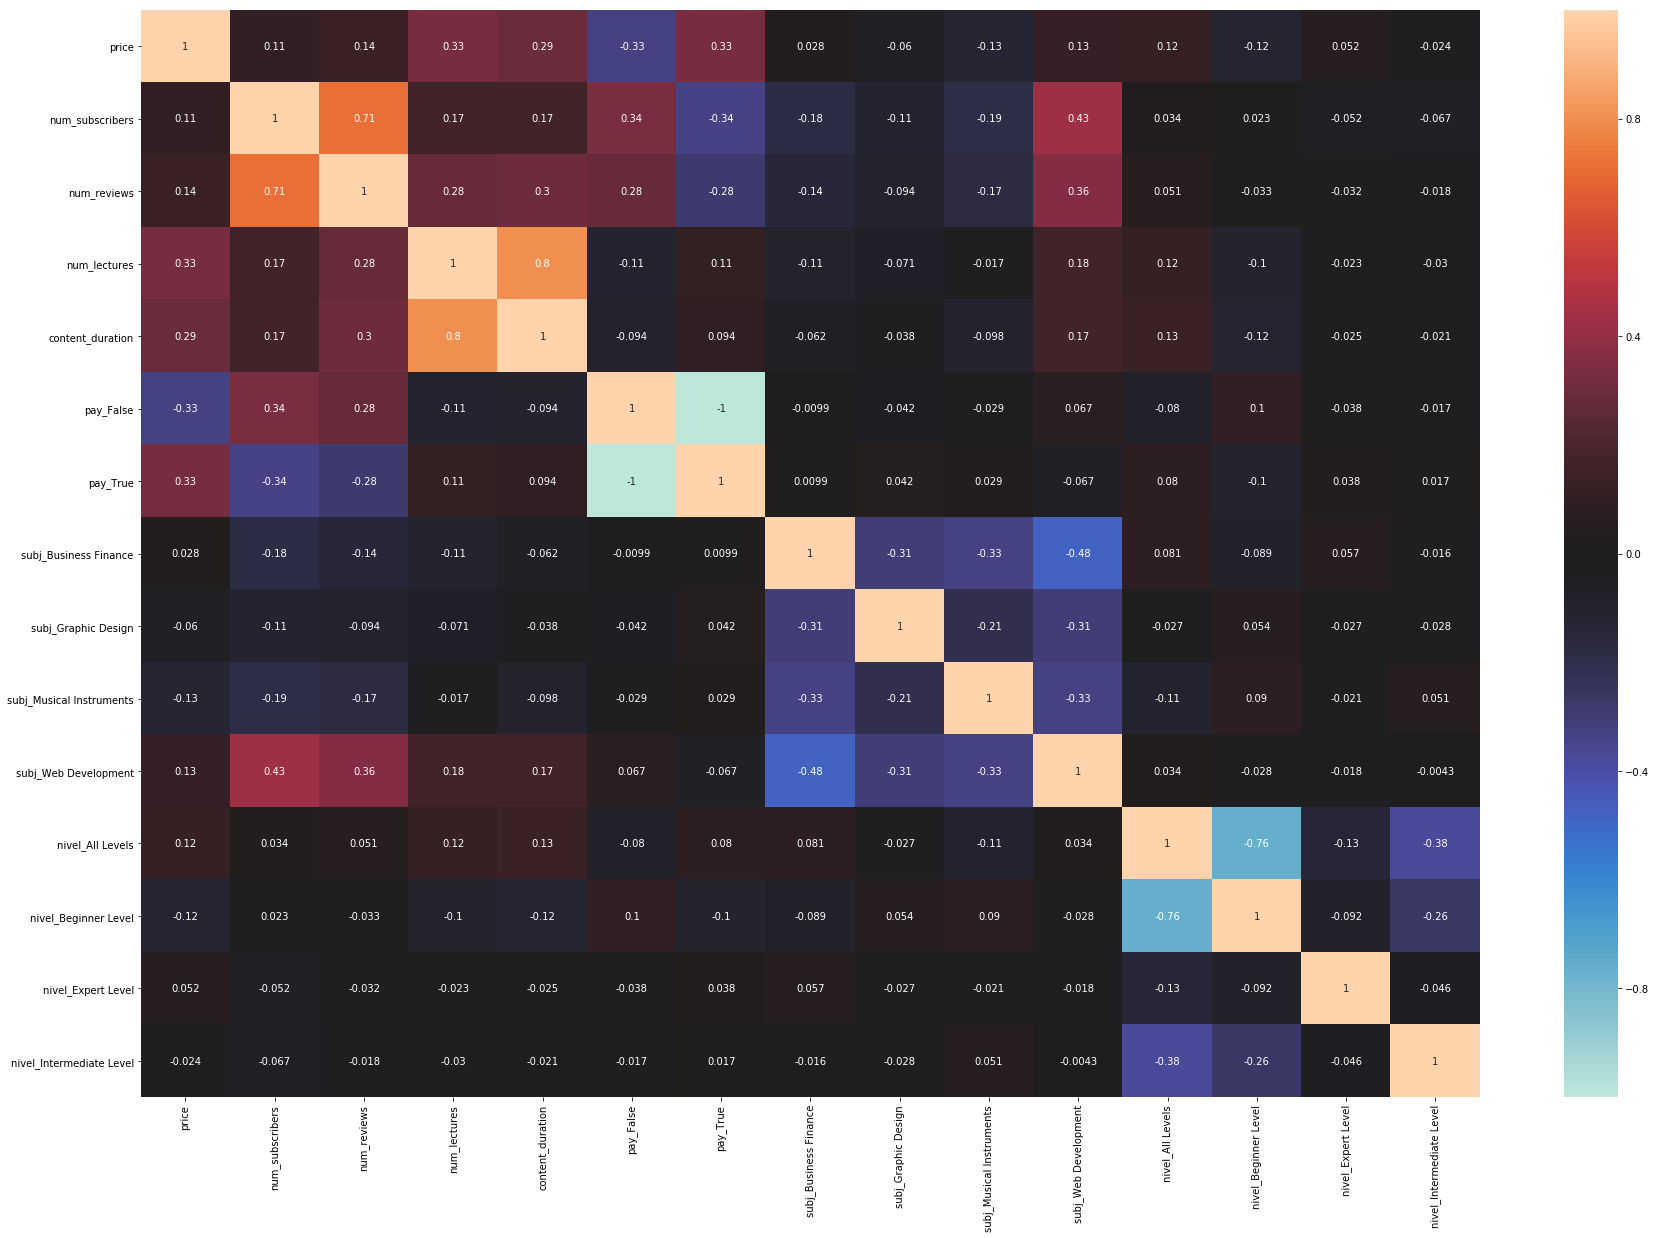

In [27]:
#Predefinimos las Dimensiones del Gráfico
plt.figure(figsize=(30,20))
#Graficamos un Mapa de Calor respecto a los Coeficientes de Correlación.
sns.heatmap(analisis2, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = analisis2.columns, 
            yticklabels = analisis2.columns);



In [28]:
data['num_subscribers_total'] = data['num_subscribers'] > 2270
data['num_subscribers_total1'] = (data['num_subscribers_total']==1).astype(int)

In [29]:
data.drop(columns = ['num_subscribers_total','num_subscribers'], inplace=True)

In [30]:
data.head()

,price,num_reviews,num_lectures,content_duration,pay_False,pay_True,subj_Business Finance,subj_Graphic Design,subj_Musical Instruments,subj_Web Development,nivel_All Levels,nivel_Beginner Level,nivel_Expert Level,nivel_Intermediate Level,num_subscribers_total1
0,200,23.00,51,1.5,0,1,1,0,0,0,1,0,0,0,0
1,75,489.15,274,39.0,0,1,1,0,0,0,1,0,0,0,1
2,45,74.00,51,2.5,0,1,1,0,0,0,0,0,0,1,0
3,95,11.00,36,3.0,0,1,1,0,0,0,1,0,0,0,1
4,200,45.00,26,2.0,0,1,1,0,0,0,0,0,0,1,0


In [31]:
y = data['num_subscribers_total1']

In [32]:
columns= [col for col in data.columns if col not in ['num_subscribers_total1']]

In [33]:
x = data[columns]

In [34]:
columns

['price',
 'num_reviews',
 'num_lectures',
 'content_duration',
 'pay_False',
 'pay_True',
 'subj_Business Finance',
 'subj_Graphic Design',
 'subj_Musical Instruments',
 'subj_Web Development',
 'nivel_All Levels',
 'nivel_Beginner Level',
 'nivel_Expert Level',
 'nivel_Intermediate Level']

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [185]:
def train(x_train,y_train):

    xgb_model = xgb.XGBClassifier()

    print("Comienza entrenamiento del modelo XGBoost")

    xgb_model.fit(x_train, y_train)

    print("Entrenamiento finalizado\n")

    print("Haciendo las predicciones\n\n")

    XGB_preds = xgb_model.predict(x_test)
    print(classification_report(y_test, XGB_preds))
    print(confusion_matrix(y_test, XGB_preds))
    return xgb_model

In [186]:
def predict(data_to_predict, xgb_model):
  
    print("\n\n-------------------------")
    print("Ingreso a la funcion de prediccion\n")

    XGB_preds = xgb_model.predict_proba(x)
    
    return XGB_preds

In [187]:
modelo = train(x_train, y_train)

Comienza entrenamiento del modelo XGBoost
Entrenamiento finalizado

Haciendo las predicciones


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       686
           1       0.84      0.63      0.72       234

   micro avg       0.88      0.88      0.88       920
   macro avg       0.86      0.79      0.82       920
weighted avg       0.87      0.88      0.87       920

[[658  28]
 [ 87 147]]


In [35]:
variables = ['num_lectures',
 'content_duration']

In [36]:
X = data[variables]

In [38]:
y = data['num_subscribers_total1']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1200)

In [41]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
y_pred_train = regressor.predict(X_train)


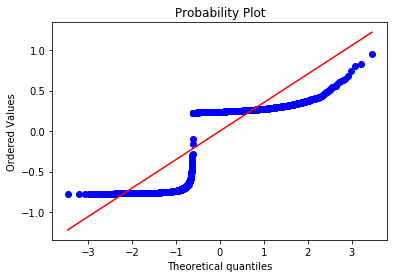

In [44]:
from scipy.stats import probplot

residuals = y_pred_train - y_train
_ = probplot(residuals, plot=plt)

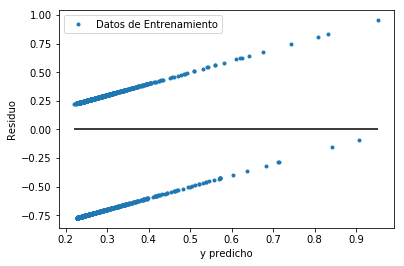

In [45]:
plt.plot(y_pred_train, residuals, '.', label="Datos de Entrenamiento")
plt.hlines(y = 0, xmin = min(y_pred_train), xmax = max(y_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

In [46]:
y_pred_test = regressor.predict(X_test)

In [50]:
print('Vector de coeficientes de la función lineal: ', regressor.coef_)
print('Ordenada en el origen (W0): ', regressor.intercept_)

('Vector de coeficientes de la funci\xc3\xb3n lineal: ', array([0.00054641, 0.00622871]))
('Ordenada en el origen (W0): ', 0.22037842551561795)


In [51]:
x_surf = np.linspace(X[X.columns[0]].min(), X[X.columns[0]].max())
y_surf = np.linspace(X[X.columns[1]].min(), X[X.columns[1]].max())
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_surface = pd.DataFrame({'x1': x_surf.ravel(), 'x2': y_surf.ravel()})
y_pred_surface = regressor.predict(X_surface)

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(x_surf, y_surf, y_pred_surface.reshape(x_surf.shape),
                rstride=1000,
                cstride=1000,
                color='gray',
                alpha = 0.2)

ax.scatter(X_test['num_lectures'], X_test['RM'], y_test, marker = '.', s=60, label = 'Datos Test')
ax.scatter(X_test['num_lectures'], X_test['RM'], y_pred_test, marker = '.', s=60, label = 'Predicción')

plt.xlabel('LSTAT')
plt.ylabel('RM')
ax.set_zlabel('PRICE')
#ax.view_init(30, 50)
ax.view_init(220, 220)


plt.legend(loc='best')
plt.show()

In [ ]:
'num_lectures',
 'content_duration'